#### Day 1

In [1]:
import math
import itertools

import numpy as np
import pandas as pd
import networkx as nx

from random import randint
from collections import Counter

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += math.trunc(float(x)/3) -2

solution

3336439

In [3]:
def fuel_calc(num: float) -> float:
    calc = math.trunc(num/3) - 2
    if calc > 0:
        return calc
    else:
        return 0

In [4]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += fuel_calc(float(x))

        add_fuel = fuel_calc(fuel_calc(float(x)))
        solution += add_fuel

        while fuel_calc(add_fuel) > 0: 
            add_fuel = fuel_calc(add_fuel)
            solution += add_fuel

solution

5001791

#### Day 2

In [5]:
with open('day2.txt', 'r') as file:
    intcode = [int(x) for x in file.read().split(',')]
    intcode[1] = 12
    intcode[2] = 2

In [6]:
class IntCode:
    def __init__(self, intcode, noun, verb):
        self.intcode = intcode
        self.noun = noun
        self.verb = verb
    
    @classmethod
    def load_txt(cls, filename):
        with open(filename, 'r') as file:
            return cls(intcode = [int(x) for x in file.read().split(',')], noun = intcode[1], verb = intcode[2])
    
    @staticmethod
    def manual_read(target, test=0):
        x = target[:]
        for num in range(0, len(x), 4):
            current_op = x[num]

            if current_op == 99:
                break
            else:
                input_loc1 = x[num+1]
                input_loc2 = x[num+2]
                output_loc3 = x[num+3]
                if current_op == 1:
                    x[output_loc3] = x[input_loc1] + x[input_loc2]
                elif current_op == 2:
                    x[output_loc3] = x[input_loc1] * x[input_loc2]

            if test == 1:
                break

        return x[0]
    
    def intcodeRead(self, noun=-1, verb=-1, test = 0):
        x = self.intcode[:]
        if noun == -1 or verb == -1:
            print(f'No valid noun/verb pair, using default Noun: {self.noun}, Verb:{self.verb}')
            x[1] = self.noun
            x[2] = self.verb
        else:
            x[1] = noun
            x[2] = verb

        result = self.manual_read(x, test)
        return result

    def brute_force(self, target):
        noun_t = randint(0, 100)
        verb_t = randint(0, 100)
        
        while self.intcodeRead(noun=noun_t, verb=verb_t) != target:
            print(f'Pair noun: {noun_t}, verb: {verb_t}, result = {self.intcodeRead(noun=noun_t, verb=verb_t)}')
            noun_t = randint(0, 100)
            verb_t = randint(0, 100)
            
        print(noun_t, verb_t)

In [7]:
a = IntCode.load_txt('day2.txt')
a.brute_force(19690720)

Pair noun: 66, verb: 68, result = 38698712
Pair noun: 98, verb: 46, result = 57130690
Pair noun: 33, verb: 86, result = 19690730
Pair noun: 60, verb: 84, result = 35242728
Pair noun: 25, verb: 45, result = 15082689
Pair noun: 39, verb: 19, result = 23146663
Pair noun: 64, verb: 21, result = 37546665
Pair noun: 9, verb: 14, result = 5866658
Pair noun: 17, verb: 74, result = 10474718
Pair noun: 91, verb: 18, result = 53098662
Pair noun: 78, verb: 17, result = 45610661
Pair noun: 11, verb: 32, result = 7018676
Pair noun: 85, verb: 76, result = 49642720
Pair noun: 60, verb: 40, result = 35242684
Pair noun: 77, verb: 92, result = 45034736
Pair noun: 78, verb: 51, result = 45610695
Pair noun: 9, verb: 66, result = 5866710
Pair noun: 35, verb: 9, result = 20842653
Pair noun: 25, verb: 85, result = 15082729
Pair noun: 38, verb: 37, result = 22570681
Pair noun: 15, verb: 99, result = 9322743
Pair noun: 80, verb: 30, result = 46762674
Pair noun: 77, verb: 56, result = 45034700
Pair noun: 56, ver

Pair noun: 67, verb: 40, result = 39274684
Pair noun: 73, verb: 34, result = 42730678
Pair noun: 40, verb: 65, result = 23722709
Pair noun: 3, verb: 36, result = 2410680
Pair noun: 3, verb: 87, result = 2410731
Pair noun: 86, verb: 12, result = 50218656
Pair noun: 71, verb: 90, result = 41578734
Pair noun: 28, verb: 96, result = 16810740
Pair noun: 20, verb: 59, result = 12202703
Pair noun: 42, verb: 38, result = 24874682
Pair noun: 20, verb: 8, result = 12202652
Pair noun: 46, verb: 7, result = 27178651
Pair noun: 10, verb: 8, result = 6442652
Pair noun: 100, verb: 73, result = 58282717
Pair noun: 36, verb: 68, result = 21418712
Pair noun: 86, verb: 88, result = 50218732
Pair noun: 5, verb: 60, result = 3562704
Pair noun: 60, verb: 51, result = 35242695
Pair noun: 62, verb: 28, result = 36394672
Pair noun: 38, verb: 35, result = 22570679
Pair noun: 43, verb: 6, result = 25450650
Pair noun: 31, verb: 86, result = 18538730
Pair noun: 95, verb: 2, result = 55402646
Pair noun: 89, verb: 7

Pair noun: 12, verb: 39, result = 7594683
Pair noun: 67, verb: 16, result = 39274660
Pair noun: 71, verb: 100, result = 41578744
Pair noun: 41, verb: 14, result = 24298658
Pair noun: 13, verb: 58, result = 8170702
Pair noun: 13, verb: 79, result = 8170723
Pair noun: 72, verb: 68, result = 42154712
Pair noun: 76, verb: 42, result = 44458686
Pair noun: 15, verb: 76, result = 9322720
Pair noun: 20, verb: 59, result = 12202703
Pair noun: 86, verb: 4, result = 50218648
Pair noun: 71, verb: 58, result = 41578702
Pair noun: 68, verb: 58, result = 39850702
Pair noun: 73, verb: 32, result = 42730676
Pair noun: 25, verb: 100, result = 15082744
Pair noun: 52, verb: 31, result = 30634675
Pair noun: 63, verb: 11, result = 36970655
Pair noun: 97, verb: 8, result = 56554652
Pair noun: 14, verb: 54, result = 8746698
Pair noun: 57, verb: 34, result = 33514678
Pair noun: 6, verb: 96, result = 4138740
Pair noun: 16, verb: 48, result = 9898692
Pair noun: 68, verb: 14, result = 39850658
Pair noun: 62, verb

Pair noun: 38, verb: 78, result = 22570722
Pair noun: 17, verb: 26, result = 10474670
Pair noun: 71, verb: 53, result = 41578697
Pair noun: 72, verb: 52, result = 42154696
Pair noun: 27, verb: 79, result = 16234723
Pair noun: 100, verb: 64, result = 58282708
Pair noun: 23, verb: 45, result = 13930689
Pair noun: 3, verb: 87, result = 2410731
Pair noun: 25, verb: 62, result = 15082706
Pair noun: 100, verb: 91, result = 58282735
Pair noun: 51, verb: 84, result = 30058728
Pair noun: 100, verb: 62, result = 58282706
Pair noun: 60, verb: 58, result = 35242702
Pair noun: 80, verb: 9, result = 46762653
Pair noun: 44, verb: 23, result = 26026667
Pair noun: 83, verb: 19, result = 48490663
Pair noun: 36, verb: 39, result = 21418683
Pair noun: 59, verb: 83, result = 34666727
Pair noun: 54, verb: 30, result = 31786674
Pair noun: 100, verb: 87, result = 58282731
Pair noun: 43, verb: 62, result = 25450706
Pair noun: 97, verb: 17, result = 56554661
Pair noun: 6, verb: 21, result = 4138665
Pair noun: 1

Pair noun: 75, verb: 24, result = 43882668
Pair noun: 2, verb: 99, result = 1834743
Pair noun: 47, verb: 13, result = 27754657
Pair noun: 75, verb: 69, result = 43882713
Pair noun: 37, verb: 86, result = 21994730
Pair noun: 69, verb: 26, result = 40426670
Pair noun: 66, verb: 60, result = 38698704
Pair noun: 16, verb: 3, result = 9898647
Pair noun: 77, verb: 94, result = 45034738
Pair noun: 7, verb: 82, result = 4714726
Pair noun: 97, verb: 2, result = 56554646
Pair noun: 7, verb: 51, result = 4714695
Pair noun: 42, verb: 31, result = 24874675
Pair noun: 77, verb: 74, result = 45034718
Pair noun: 13, verb: 92, result = 8170736
Pair noun: 1, verb: 25, result = 1258669
Pair noun: 47, verb: 10, result = 27754654
Pair noun: 50, verb: 44, result = 29482688
Pair noun: 27, verb: 0, result = 16234644
Pair noun: 90, verb: 84, result = 52522728
Pair noun: 5, verb: 14, result = 3562658
Pair noun: 31, verb: 94, result = 18538738
Pair noun: 68, verb: 88, result = 39850732
Pair noun: 40, verb: 9, re

Pair noun: 77, verb: 18, result = 45034662
Pair noun: 19, verb: 81, result = 11626725
Pair noun: 73, verb: 38, result = 42730682
Pair noun: 63, verb: 80, result = 36970724
Pair noun: 93, verb: 10, result = 54250654
Pair noun: 26, verb: 19, result = 15658663
Pair noun: 3, verb: 38, result = 2410682
Pair noun: 43, verb: 74, result = 25450718
Pair noun: 58, verb: 96, result = 34090740
Pair noun: 92, verb: 44, result = 53674688
Pair noun: 77, verb: 22, result = 45034666
Pair noun: 28, verb: 63, result = 16810707
Pair noun: 89, verb: 43, result = 51946687
Pair noun: 37, verb: 44, result = 21994688
Pair noun: 97, verb: 20, result = 56554664
Pair noun: 62, verb: 49, result = 36394693
Pair noun: 82, verb: 6, result = 47914650
Pair noun: 65, verb: 6, result = 38122650
Pair noun: 67, verb: 32, result = 39274676
Pair noun: 8, verb: 20, result = 5290664
Pair noun: 5, verb: 19, result = 3562663
Pair noun: 100, verb: 2, result = 58282646
Pair noun: 45, verb: 27, result = 26602671
Pair noun: 77, verb

Pair noun: 0, verb: 73, result = 682717
Pair noun: 86, verb: 75, result = 50218719
Pair noun: 38, verb: 30, result = 22570674
Pair noun: 28, verb: 13, result = 16810657
Pair noun: 93, verb: 57, result = 54250701
Pair noun: 39, verb: 94, result = 23146738
Pair noun: 28, verb: 60, result = 16810704
Pair noun: 28, verb: 31, result = 16810675
Pair noun: 68, verb: 52, result = 39850696
Pair noun: 60, verb: 61, result = 35242705
Pair noun: 13, verb: 66, result = 8170710
Pair noun: 62, verb: 26, result = 36394670
Pair noun: 37, verb: 78, result = 21994722
Pair noun: 61, verb: 63, result = 35818707
Pair noun: 57, verb: 29, result = 33514673
Pair noun: 26, verb: 37, result = 15658681
Pair noun: 59, verb: 31, result = 34666675
Pair noun: 83, verb: 30, result = 48490674
Pair noun: 89, verb: 11, result = 51946655
Pair noun: 27, verb: 11, result = 16234655
Pair noun: 40, verb: 80, result = 23722724
Pair noun: 18, verb: 13, result = 11050657
Pair noun: 55, verb: 93, result = 32362737
Pair noun: 46, 

Pair noun: 88, verb: 78, result = 51370722
Pair noun: 85, verb: 18, result = 49642662
Pair noun: 63, verb: 89, result = 36970733
Pair noun: 40, verb: 62, result = 23722706
Pair noun: 36, verb: 95, result = 21418739
Pair noun: 66, verb: 13, result = 38698657
Pair noun: 27, verb: 71, result = 16234715
Pair noun: 46, verb: 93, result = 27178737
Pair noun: 5, verb: 20, result = 3562664
Pair noun: 73, verb: 40, result = 42730684
Pair noun: 75, verb: 89, result = 43882733
Pair noun: 68, verb: 62, result = 39850706
Pair noun: 94, verb: 93, result = 54826737
Pair noun: 61, verb: 69, result = 35818713
Pair noun: 19, verb: 38, result = 11626682
Pair noun: 45, verb: 23, result = 26602667
Pair noun: 8, verb: 40, result = 5290684
Pair noun: 10, verb: 87, result = 6442731
Pair noun: 64, verb: 65, result = 37546709
Pair noun: 79, verb: 38, result = 46186682
Pair noun: 27, verb: 47, result = 16234691
Pair noun: 71, verb: 77, result = 41578721
Pair noun: 46, verb: 28, result = 27178672
Pair noun: 45, v

Pair noun: 31, verb: 4, result = 18538648
Pair noun: 7, verb: 23, result = 4714667
Pair noun: 84, verb: 23, result = 49066667
Pair noun: 75, verb: 47, result = 43882691
Pair noun: 59, verb: 85, result = 34666729
Pair noun: 96, verb: 80, result = 55978724
Pair noun: 18, verb: 49, result = 11050693
Pair noun: 88, verb: 2, result = 51370646
Pair noun: 55, verb: 54, result = 32362698
Pair noun: 53, verb: 57, result = 31210701
Pair noun: 87, verb: 3, result = 50794647
Pair noun: 50, verb: 58, result = 29482702
Pair noun: 31, verb: 36, result = 18538680
Pair noun: 42, verb: 93, result = 24874737
Pair noun: 8, verb: 85, result = 5290729
Pair noun: 11, verb: 78, result = 7018722
Pair noun: 45, verb: 62, result = 26602706
Pair noun: 15, verb: 98, result = 9322742
Pair noun: 73, verb: 28, result = 42730672
Pair noun: 84, verb: 35, result = 49066679
Pair noun: 52, verb: 44, result = 30634688
Pair noun: 38, verb: 0, result = 22570644
Pair noun: 49, verb: 63, result = 28906707
Pair noun: 59, verb: 

Pair noun: 19, verb: 89, result = 11626733
Pair noun: 30, verb: 11, result = 17962655
Pair noun: 100, verb: 2, result = 58282646
Pair noun: 70, verb: 43, result = 41002687
Pair noun: 85, verb: 26, result = 49642670
Pair noun: 8, verb: 56, result = 5290700
Pair noun: 2, verb: 0, result = 1834644
Pair noun: 9, verb: 60, result = 5866704
Pair noun: 35, verb: 66, result = 20842710
Pair noun: 60, verb: 70, result = 35242714
Pair noun: 95, verb: 30, result = 55402674
Pair noun: 42, verb: 80, result = 24874724
Pair noun: 35, verb: 40, result = 20842684
Pair noun: 32, verb: 15, result = 19114659
Pair noun: 48, verb: 46, result = 28330690
Pair noun: 59, verb: 37, result = 34666681
Pair noun: 8, verb: 18, result = 5290662
Pair noun: 85, verb: 51, result = 49642695
Pair noun: 5, verb: 32, result = 3562676
Pair noun: 92, verb: 86, result = 53674730
Pair noun: 63, verb: 72, result = 36970716
Pair noun: 9, verb: 71, result = 5866715
Pair noun: 11, verb: 38, result = 7018682
Pair noun: 63, verb: 94, 

Pair noun: 78, verb: 31, result = 45610675
Pair noun: 44, verb: 72, result = 26026716
Pair noun: 95, verb: 81, result = 55402725
Pair noun: 44, verb: 100, result = 26026744
Pair noun: 98, verb: 10, result = 57130654
Pair noun: 56, verb: 25, result = 32938669
Pair noun: 22, verb: 65, result = 13354709
Pair noun: 36, verb: 50, result = 21418694
Pair noun: 53, verb: 66, result = 31210710
Pair noun: 21, verb: 13, result = 12778657
Pair noun: 67, verb: 72, result = 39274716
Pair noun: 33, verb: 10, result = 19690654
Pair noun: 19, verb: 77, result = 11626721
Pair noun: 53, verb: 65, result = 31210709
Pair noun: 91, verb: 24, result = 53098668
Pair noun: 1, verb: 29, result = 1258673
Pair noun: 27, verb: 46, result = 16234690
Pair noun: 54, verb: 58, result = 31786702
Pair noun: 41, verb: 100, result = 24298744
Pair noun: 32, verb: 66, result = 19114710
Pair noun: 9, verb: 4, result = 5866648
Pair noun: 86, verb: 88, result = 50218732
Pair noun: 53, verb: 96, result = 31210740
Pair noun: 51,

Pair noun: 17, verb: 8, result = 10474652
Pair noun: 83, verb: 33, result = 48490677
Pair noun: 38, verb: 59, result = 22570703
Pair noun: 32, verb: 15, result = 19114659
Pair noun: 11, verb: 94, result = 7018738
Pair noun: 95, verb: 7, result = 55402651
Pair noun: 82, verb: 18, result = 47914662
Pair noun: 35, verb: 64, result = 20842708
Pair noun: 78, verb: 44, result = 45610688
Pair noun: 64, verb: 85, result = 37546729
Pair noun: 45, verb: 5, result = 26602649
Pair noun: 17, verb: 77, result = 10474721
Pair noun: 16, verb: 82, result = 9898726
Pair noun: 61, verb: 50, result = 35818694
Pair noun: 18, verb: 82, result = 11050726
Pair noun: 45, verb: 20, result = 26602664
Pair noun: 8, verb: 55, result = 5290699
Pair noun: 37, verb: 74, result = 21994718
Pair noun: 86, verb: 84, result = 50218728
Pair noun: 2, verb: 55, result = 1834699
Pair noun: 72, verb: 6, result = 42154650
Pair noun: 0, verb: 42, result = 682686
Pair noun: 68, verb: 6, result = 39850650
Pair noun: 24, verb: 39, 

Pair noun: 90, verb: 75, result = 52522719
Pair noun: 17, verb: 71, result = 10474715
Pair noun: 64, verb: 2, result = 37546646
Pair noun: 42, verb: 98, result = 24874742
Pair noun: 22, verb: 46, result = 13354690
Pair noun: 89, verb: 41, result = 51946685
Pair noun: 54, verb: 89, result = 31786733
Pair noun: 95, verb: 66, result = 55402710
Pair noun: 90, verb: 48, result = 52522692
Pair noun: 66, verb: 61, result = 38698705
Pair noun: 8, verb: 22, result = 5290666
Pair noun: 10, verb: 8, result = 6442652
Pair noun: 88, verb: 85, result = 51370729
Pair noun: 70, verb: 99, result = 41002743
Pair noun: 6, verb: 46, result = 4138690
Pair noun: 49, verb: 41, result = 28906685
Pair noun: 73, verb: 5, result = 42730649
Pair noun: 32, verb: 73, result = 19114717
Pair noun: 17, verb: 88, result = 10474732
Pair noun: 47, verb: 79, result = 27754723
Pair noun: 99, verb: 13, result = 57706657
Pair noun: 80, verb: 77, result = 46762721
Pair noun: 0, verb: 91, result = 682735
Pair noun: 94, verb: 8

Pair noun: 71, verb: 59, result = 41578703
Pair noun: 53, verb: 45, result = 31210689
Pair noun: 71, verb: 4, result = 41578648
Pair noun: 88, verb: 99, result = 51370743
Pair noun: 52, verb: 69, result = 30634713
Pair noun: 17, verb: 20, result = 10474664
Pair noun: 63, verb: 7, result = 36970651
Pair noun: 92, verb: 19, result = 53674663
Pair noun: 66, verb: 51, result = 38698695
Pair noun: 48, verb: 70, result = 28330714
Pair noun: 86, verb: 61, result = 50218705
Pair noun: 15, verb: 41, result = 9322685
Pair noun: 27, verb: 26, result = 16234670
Pair noun: 23, verb: 5, result = 13930649
Pair noun: 85, verb: 85, result = 49642729
Pair noun: 91, verb: 36, result = 53098680
Pair noun: 11, verb: 77, result = 7018721
Pair noun: 41, verb: 19, result = 24298663
Pair noun: 29, verb: 38, result = 17386682
Pair noun: 43, verb: 71, result = 25450715
Pair noun: 5, verb: 4, result = 3562648
Pair noun: 12, verb: 97, result = 7594741
Pair noun: 43, verb: 94, result = 25450738
Pair noun: 53, verb:

Pair noun: 13, verb: 56, result = 8170700
Pair noun: 71, verb: 13, result = 41578657
Pair noun: 89, verb: 40, result = 51946684
Pair noun: 58, verb: 0, result = 34090644
Pair noun: 64, verb: 12, result = 37546656
Pair noun: 11, verb: 63, result = 7018707
Pair noun: 76, verb: 26, result = 44458670
Pair noun: 14, verb: 38, result = 8746682
Pair noun: 29, verb: 42, result = 17386686
Pair noun: 25, verb: 42, result = 15082686
Pair noun: 76, verb: 33, result = 44458677
Pair noun: 80, verb: 49, result = 46762693
Pair noun: 0, verb: 80, result = 682724
Pair noun: 9, verb: 50, result = 5866694
Pair noun: 91, verb: 90, result = 53098734
Pair noun: 94, verb: 18, result = 54826662
Pair noun: 81, verb: 7, result = 47338651
Pair noun: 43, verb: 66, result = 25450710
Pair noun: 22, verb: 59, result = 13354703
Pair noun: 9, verb: 56, result = 5866700
Pair noun: 11, verb: 48, result = 7018692
Pair noun: 39, verb: 3, result = 23146647
Pair noun: 64, verb: 15, result = 37546659
Pair noun: 44, verb: 41, 

Pair noun: 83, verb: 46, result = 48490690
Pair noun: 46, verb: 4, result = 27178648
Pair noun: 25, verb: 88, result = 15082732
Pair noun: 68, verb: 70, result = 39850714
Pair noun: 45, verb: 43, result = 26602687
Pair noun: 78, verb: 21, result = 45610665
Pair noun: 26, verb: 57, result = 15658701
Pair noun: 4, verb: 23, result = 2986667
Pair noun: 46, verb: 60, result = 27178704
Pair noun: 90, verb: 69, result = 52522713
Pair noun: 91, verb: 9, result = 53098653
Pair noun: 65, verb: 52, result = 38122696
Pair noun: 17, verb: 77, result = 10474721
Pair noun: 55, verb: 74, result = 32362718
Pair noun: 79, verb: 10, result = 46186654
Pair noun: 19, verb: 29, result = 11626673
Pair noun: 13, verb: 28, result = 8170672
Pair noun: 44, verb: 64, result = 26026708
Pair noun: 42, verb: 4, result = 24874648
Pair noun: 80, verb: 17, result = 46762661
Pair noun: 59, verb: 47, result = 34666691
Pair noun: 63, verb: 6, result = 36970650
Pair noun: 21, verb: 69, result = 12778713
Pair noun: 97, ver

Pair noun: 80, verb: 97, result = 46762741
Pair noun: 64, verb: 80, result = 37546724
Pair noun: 3, verb: 96, result = 2410740
Pair noun: 76, verb: 28, result = 44458672
Pair noun: 30, verb: 42, result = 17962686
Pair noun: 74, verb: 73, result = 43306717
Pair noun: 20, verb: 98, result = 12202742
Pair noun: 23, verb: 24, result = 13930668
Pair noun: 100, verb: 78, result = 58282722
Pair noun: 30, verb: 51, result = 17962695
Pair noun: 12, verb: 13, result = 7594657
Pair noun: 29, verb: 9, result = 17386653
Pair noun: 2, verb: 35, result = 1834679
Pair noun: 64, verb: 84, result = 37546728
Pair noun: 22, verb: 42, result = 13354686
Pair noun: 50, verb: 21, result = 29482665
Pair noun: 14, verb: 2, result = 8746646
Pair noun: 92, verb: 55, result = 53674699
Pair noun: 15, verb: 15, result = 9322659
Pair noun: 95, verb: 65, result = 55402709
Pair noun: 47, verb: 52, result = 27754696
Pair noun: 53, verb: 33, result = 31210677
Pair noun: 74, verb: 76, result = 43306720
Pair noun: 6, verb:

Pair noun: 36, verb: 9, result = 21418653
Pair noun: 46, verb: 47, result = 27178691
Pair noun: 48, verb: 2, result = 28330646
Pair noun: 30, verb: 23, result = 17962667
Pair noun: 91, verb: 8, result = 53098652
Pair noun: 92, verb: 0, result = 53674644
Pair noun: 75, verb: 39, result = 43882683
Pair noun: 75, verb: 66, result = 43882710
Pair noun: 91, verb: 12, result = 53098656
Pair noun: 80, verb: 32, result = 46762676
Pair noun: 42, verb: 81, result = 24874725
Pair noun: 9, verb: 2, result = 5866646
Pair noun: 25, verb: 23, result = 15082667
Pair noun: 54, verb: 67, result = 31786711
Pair noun: 30, verb: 58, result = 17962702
Pair noun: 55, verb: 25, result = 32362669
Pair noun: 36, verb: 77, result = 21418721
Pair noun: 80, verb: 90, result = 46762734
Pair noun: 19, verb: 70, result = 11626714
Pair noun: 36, verb: 0, result = 21418644
Pair noun: 83, verb: 50, result = 48490694
Pair noun: 47, verb: 41, result = 27754685
Pair noun: 78, verb: 97, result = 45610741
Pair noun: 93, verb

Pair noun: 12, verb: 97, result = 7594741
Pair noun: 27, verb: 92, result = 16234736
Pair noun: 24, verb: 24, result = 14506668
Pair noun: 61, verb: 85, result = 35818729
Pair noun: 64, verb: 65, result = 37546709
Pair noun: 19, verb: 78, result = 11626722
Pair noun: 88, verb: 39, result = 51370683
Pair noun: 67, verb: 47, result = 39274691
Pair noun: 13, verb: 96, result = 8170740
Pair noun: 48, verb: 27, result = 28330671
Pair noun: 29, verb: 45, result = 17386689
Pair noun: 99, verb: 71, result = 57706715
Pair noun: 69, verb: 59, result = 40426703
Pair noun: 60, verb: 58, result = 35242702
Pair noun: 7, verb: 57, result = 4714701
Pair noun: 38, verb: 67, result = 22570711
Pair noun: 79, verb: 20, result = 46186664
Pair noun: 32, verb: 3, result = 19114647
Pair noun: 36, verb: 93, result = 21418737
Pair noun: 72, verb: 32, result = 42154676
Pair noun: 56, verb: 45, result = 32938689
Pair noun: 67, verb: 17, result = 39274661
Pair noun: 75, verb: 21, result = 43882665
Pair noun: 91, v

Pair noun: 43, verb: 26, result = 25450670
Pair noun: 38, verb: 28, result = 22570672
Pair noun: 52, verb: 45, result = 30634689
Pair noun: 52, verb: 10, result = 30634654
Pair noun: 22, verb: 92, result = 13354736
Pair noun: 71, verb: 23, result = 41578667
Pair noun: 18, verb: 33, result = 11050677
Pair noun: 26, verb: 17, result = 15658661
Pair noun: 81, verb: 44, result = 47338688
Pair noun: 79, verb: 26, result = 46186670
Pair noun: 19, verb: 27, result = 11626671
Pair noun: 28, verb: 35, result = 16810679
Pair noun: 86, verb: 25, result = 50218669
Pair noun: 15, verb: 100, result = 9322744
Pair noun: 19, verb: 81, result = 11626725
Pair noun: 76, verb: 78, result = 44458722
Pair noun: 77, verb: 81, result = 45034725
Pair noun: 86, verb: 1, result = 50218645
Pair noun: 58, verb: 51, result = 34090695
Pair noun: 66, verb: 71, result = 38698715
Pair noun: 4, verb: 74, result = 2986718
Pair noun: 50, verb: 52, result = 29482696
Pair noun: 66, verb: 22, result = 38698666
Pair noun: 12,

Pair noun: 91, verb: 24, result = 53098668
Pair noun: 76, verb: 57, result = 44458701
Pair noun: 11, verb: 15, result = 7018659
Pair noun: 29, verb: 5, result = 17386649
Pair noun: 50, verb: 81, result = 29482725
Pair noun: 13, verb: 36, result = 8170680
Pair noun: 56, verb: 23, result = 32938667
Pair noun: 18, verb: 96, result = 11050740
Pair noun: 4, verb: 48, result = 2986692
Pair noun: 33, verb: 55, result = 19690699
Pair noun: 99, verb: 92, result = 57706736
Pair noun: 65, verb: 17, result = 38122661
Pair noun: 81, verb: 76, result = 47338720
Pair noun: 16, verb: 43, result = 9898687
Pair noun: 66, verb: 50, result = 38698694
Pair noun: 100, verb: 74, result = 58282718
Pair noun: 59, verb: 79, result = 34666723
Pair noun: 95, verb: 44, result = 55402688
Pair noun: 40, verb: 97, result = 23722741
Pair noun: 72, verb: 36, result = 42154680
Pair noun: 51, verb: 42, result = 30058686
Pair noun: 15, verb: 0, result = 9322644
Pair noun: 46, verb: 55, result = 27178699
Pair noun: 93, ver

Pair noun: 39, verb: 80, result = 23146724
Pair noun: 54, verb: 71, result = 31786715
Pair noun: 45, verb: 19, result = 26602663
Pair noun: 54, verb: 27, result = 31786671
Pair noun: 100, verb: 49, result = 58282693
Pair noun: 77, verb: 3, result = 45034647
Pair noun: 36, verb: 34, result = 21418678
Pair noun: 16, verb: 94, result = 9898738
Pair noun: 83, verb: 70, result = 48490714
Pair noun: 85, verb: 68, result = 49642712
Pair noun: 22, verb: 96, result = 13354740
Pair noun: 97, verb: 85, result = 56554729
Pair noun: 43, verb: 70, result = 25450714
Pair noun: 5, verb: 30, result = 3562674
Pair noun: 69, verb: 30, result = 40426674
Pair noun: 87, verb: 48, result = 50794692
Pair noun: 17, verb: 51, result = 10474695
Pair noun: 80, verb: 2, result = 46762646
Pair noun: 65, verb: 65, result = 38122709
Pair noun: 75, verb: 21, result = 43882665
Pair noun: 95, verb: 95, result = 55402739
Pair noun: 54, verb: 90, result = 31786734
Pair noun: 51, verb: 50, result = 30058694
Pair noun: 65, 

Pair noun: 43, verb: 77, result = 25450721
Pair noun: 75, verb: 24, result = 43882668
Pair noun: 90, verb: 30, result = 52522674
Pair noun: 4, verb: 87, result = 2986731
Pair noun: 82, verb: 96, result = 47914740
Pair noun: 19, verb: 25, result = 11626669
Pair noun: 57, verb: 90, result = 33514734
Pair noun: 98, verb: 31, result = 57130675
Pair noun: 11, verb: 30, result = 7018674
Pair noun: 60, verb: 65, result = 35242709
Pair noun: 95, verb: 47, result = 55402691
Pair noun: 81, verb: 94, result = 47338738
Pair noun: 61, verb: 46, result = 35818690
Pair noun: 29, verb: 40, result = 17386684
Pair noun: 26, verb: 3, result = 15658647
Pair noun: 64, verb: 13, result = 37546657
Pair noun: 3, verb: 77, result = 2410721
Pair noun: 3, verb: 69, result = 2410713
Pair noun: 30, verb: 89, result = 17962733
Pair noun: 50, verb: 75, result = 29482719
Pair noun: 22, verb: 14, result = 13354658
Pair noun: 5, verb: 85, result = 3562729
Pair noun: 20, verb: 29, result = 12202673
Pair noun: 22, verb: 

Pair noun: 13, verb: 40, result = 8170684
Pair noun: 11, verb: 94, result = 7018738
Pair noun: 49, verb: 92, result = 28906736
Pair noun: 76, verb: 29, result = 44458673
Pair noun: 84, verb: 79, result = 49066723
Pair noun: 53, verb: 6, result = 31210650
Pair noun: 13, verb: 12, result = 8170656
Pair noun: 8, verb: 50, result = 5290694
Pair noun: 52, verb: 23, result = 30634667
Pair noun: 15, verb: 19, result = 9322663
Pair noun: 7, verb: 38, result = 4714682
Pair noun: 34, verb: 92, result = 20266736
Pair noun: 99, verb: 70, result = 57706714
Pair noun: 94, verb: 78, result = 54826722
Pair noun: 85, verb: 3, result = 49642647
Pair noun: 46, verb: 21, result = 27178665
Pair noun: 53, verb: 10, result = 31210654
Pair noun: 61, verb: 95, result = 35818739
Pair noun: 51, verb: 77, result = 30058721
Pair noun: 16, verb: 34, result = 9898678
Pair noun: 16, verb: 12, result = 9898656
Pair noun: 64, verb: 24, result = 37546668
Pair noun: 61, verb: 1, result = 35818645
Pair noun: 18, verb: 61,

Pair noun: 58, verb: 80, result = 34090724
Pair noun: 61, verb: 97, result = 35818741
Pair noun: 65, verb: 90, result = 38122734
Pair noun: 15, verb: 68, result = 9322712
Pair noun: 66, verb: 17, result = 38698661
Pair noun: 99, verb: 92, result = 57706736
Pair noun: 56, verb: 20, result = 32938664
Pair noun: 60, verb: 98, result = 35242742
Pair noun: 34, verb: 88, result = 20266732
Pair noun: 77, verb: 62, result = 45034706
Pair noun: 16, verb: 33, result = 9898677
Pair noun: 38, verb: 43, result = 22570687
Pair noun: 6, verb: 15, result = 4138659
Pair noun: 26, verb: 39, result = 15658683
Pair noun: 22, verb: 22, result = 13354666
Pair noun: 33, verb: 52, result = 19690696
Pair noun: 12, verb: 1, result = 7594645
Pair noun: 13, verb: 74, result = 8170718
Pair noun: 32, verb: 25, result = 19114669
Pair noun: 72, verb: 72, result = 42154716
Pair noun: 84, verb: 90, result = 49066734
Pair noun: 84, verb: 35, result = 49066679
Pair noun: 70, verb: 25, result = 41002669
Pair noun: 43, ver

Pair noun: 99, verb: 94, result = 57706738
Pair noun: 21, verb: 20, result = 12778664
Pair noun: 33, verb: 5, result = 19690649
Pair noun: 34, verb: 28, result = 20266672
Pair noun: 51, verb: 55, result = 30058699
Pair noun: 87, verb: 11, result = 50794655
Pair noun: 0, verb: 11, result = 682655
Pair noun: 57, verb: 35, result = 33514679
Pair noun: 61, verb: 41, result = 35818685
Pair noun: 57, verb: 7, result = 33514651
Pair noun: 84, verb: 100, result = 49066744
Pair noun: 88, verb: 87, result = 51370731
Pair noun: 7, verb: 73, result = 4714717
Pair noun: 22, verb: 46, result = 13354690
Pair noun: 22, verb: 69, result = 13354713
Pair noun: 91, verb: 62, result = 53098706
Pair noun: 45, verb: 14, result = 26602658
Pair noun: 44, verb: 35, result = 26026679
Pair noun: 17, verb: 36, result = 10474680
Pair noun: 36, verb: 77, result = 21418721
Pair noun: 53, verb: 80, result = 31210724
Pair noun: 42, verb: 53, result = 24874697
Pair noun: 95, verb: 0, result = 55402644
Pair noun: 6, verb

Pair noun: 99, verb: 40, result = 57706684
Pair noun: 71, verb: 84, result = 41578728
Pair noun: 93, verb: 22, result = 54250666
Pair noun: 53, verb: 12, result = 31210656
Pair noun: 96, verb: 5, result = 55978649
Pair noun: 5, verb: 7, result = 3562651
Pair noun: 44, verb: 43, result = 26026687
Pair noun: 83, verb: 16, result = 48490660
Pair noun: 99, verb: 60, result = 57706704
Pair noun: 3, verb: 64, result = 2410708
Pair noun: 6, verb: 5, result = 4138649
Pair noun: 80, verb: 98, result = 46762742
Pair noun: 78, verb: 24, result = 45610668
Pair noun: 50, verb: 35, result = 29482679
Pair noun: 56, verb: 63, result = 32938707
Pair noun: 51, verb: 25, result = 30058669
Pair noun: 13, verb: 70, result = 8170714
Pair noun: 19, verb: 69, result = 11626713
Pair noun: 96, verb: 39, result = 55978683
Pair noun: 13, verb: 65, result = 8170709
Pair noun: 18, verb: 1, result = 11050645
Pair noun: 4, verb: 38, result = 2986682
Pair noun: 28, verb: 64, result = 16810708
Pair noun: 71, verb: 87, 

Pair noun: 95, verb: 32, result = 55402676
Pair noun: 58, verb: 67, result = 34090711
Pair noun: 72, verb: 58, result = 42154702
Pair noun: 1, verb: 50, result = 1258694
Pair noun: 80, verb: 91, result = 46762735
Pair noun: 32, verb: 99, result = 19114743
Pair noun: 12, verb: 14, result = 7594658
Pair noun: 6, verb: 59, result = 4138703
Pair noun: 87, verb: 30, result = 50794674
Pair noun: 48, verb: 2, result = 28330646
Pair noun: 94, verb: 52, result = 54826696
Pair noun: 84, verb: 27, result = 49066671
Pair noun: 1, verb: 76, result = 1258720
Pair noun: 28, verb: 15, result = 16810659
Pair noun: 71, verb: 85, result = 41578729
Pair noun: 60, verb: 92, result = 35242736
Pair noun: 13, verb: 1, result = 8170645
Pair noun: 8, verb: 98, result = 5290742
Pair noun: 87, verb: 68, result = 50794712
Pair noun: 74, verb: 15, result = 43306659
Pair noun: 68, verb: 19, result = 39850663
Pair noun: 33, verb: 100, result = 19690744
Pair noun: 59, verb: 90, result = 34666734
Pair noun: 28, verb: 4

Pair noun: 69, verb: 5, result = 40426649
Pair noun: 27, verb: 11, result = 16234655
Pair noun: 77, verb: 79, result = 45034723
Pair noun: 7, verb: 10, result = 4714654
Pair noun: 28, verb: 42, result = 16810686
Pair noun: 8, verb: 89, result = 5290733
Pair noun: 54, verb: 16, result = 31786660
Pair noun: 5, verb: 27, result = 3562671
Pair noun: 98, verb: 29, result = 57130673
Pair noun: 52, verb: 29, result = 30634673
Pair noun: 96, verb: 19, result = 55978663
Pair noun: 78, verb: 35, result = 45610679
Pair noun: 37, verb: 96, result = 21994740
Pair noun: 98, verb: 7, result = 57130651
Pair noun: 58, verb: 22, result = 34090666
Pair noun: 64, verb: 54, result = 37546698
Pair noun: 18, verb: 75, result = 11050719
Pair noun: 87, verb: 78, result = 50794722
Pair noun: 92, verb: 68, result = 53674712
Pair noun: 71, verb: 3, result = 41578647
Pair noun: 72, verb: 94, result = 42154738
Pair noun: 8, verb: 52, result = 5290696
Pair noun: 6, verb: 95, result = 4138739
Pair noun: 78, verb: 86,

Pair noun: 60, verb: 70, result = 35242714
Pair noun: 77, verb: 70, result = 45034714
Pair noun: 37, verb: 98, result = 21994742
Pair noun: 9, verb: 3, result = 5866647
Pair noun: 67, verb: 32, result = 39274676
Pair noun: 12, verb: 34, result = 7594678
Pair noun: 27, verb: 87, result = 16234731
Pair noun: 4, verb: 54, result = 2986698
Pair noun: 22, verb: 61, result = 13354705
Pair noun: 82, verb: 79, result = 47914723
Pair noun: 1, verb: 56, result = 1258700
Pair noun: 12, verb: 48, result = 7594692
Pair noun: 32, verb: 72, result = 19114716
Pair noun: 32, verb: 92, result = 19114736
Pair noun: 46, verb: 68, result = 27178712
Pair noun: 83, verb: 67, result = 48490711
Pair noun: 44, verb: 1, result = 26026645
Pair noun: 23, verb: 64, result = 13930708
Pair noun: 74, verb: 8, result = 43306652
Pair noun: 73, verb: 11, result = 42730655
Pair noun: 76, verb: 42, result = 44458686
Pair noun: 45, verb: 92, result = 26602736
Pair noun: 58, verb: 25, result = 34090669
Pair noun: 56, verb: 8

Pair noun: 71, verb: 16, result = 41578660
Pair noun: 99, verb: 21, result = 57706665
Pair noun: 83, verb: 78, result = 48490722
Pair noun: 16, verb: 21, result = 9898665
Pair noun: 51, verb: 76, result = 30058720
Pair noun: 43, verb: 82, result = 25450726
Pair noun: 12, verb: 81, result = 7594725
Pair noun: 31, verb: 17, result = 18538661
Pair noun: 93, verb: 34, result = 54250678
Pair noun: 39, verb: 34, result = 23146678
Pair noun: 43, verb: 31, result = 25450675
Pair noun: 0, verb: 27, result = 682671
Pair noun: 27, verb: 73, result = 16234717
Pair noun: 30, verb: 18, result = 17962662
Pair noun: 44, verb: 13, result = 26026657
Pair noun: 49, verb: 37, result = 28906681
Pair noun: 17, verb: 61, result = 10474705
Pair noun: 79, verb: 90, result = 46186734
Pair noun: 87, verb: 93, result = 50794737
Pair noun: 32, verb: 14, result = 19114658
Pair noun: 8, verb: 73, result = 5290717
Pair noun: 92, verb: 61, result = 53674705
Pair noun: 39, verb: 5, result = 23146649
Pair noun: 96, verb

Pair noun: 92, verb: 91, result = 53674735
Pair noun: 9, verb: 95, result = 5866739
Pair noun: 82, verb: 26, result = 47914670
Pair noun: 20, verb: 1, result = 12202645
Pair noun: 77, verb: 33, result = 45034677
Pair noun: 26, verb: 35, result = 15658679
Pair noun: 58, verb: 86, result = 34090730
Pair noun: 42, verb: 21, result = 24874665
Pair noun: 22, verb: 72, result = 13354716
Pair noun: 15, verb: 44, result = 9322688
Pair noun: 34, verb: 14, result = 20266658
Pair noun: 79, verb: 91, result = 46186735
Pair noun: 68, verb: 77, result = 39850721
Pair noun: 98, verb: 32, result = 57130676
Pair noun: 5, verb: 83, result = 3562727
Pair noun: 77, verb: 2, result = 45034646
Pair noun: 80, verb: 29, result = 46762673
Pair noun: 57, verb: 21, result = 33514665
Pair noun: 89, verb: 20, result = 51946664
Pair noun: 6, verb: 93, result = 4138737
Pair noun: 28, verb: 76, result = 16810720
Pair noun: 94, verb: 32, result = 54826676
Pair noun: 80, verb: 74, result = 46762718
Pair noun: 54, verb:

Pair noun: 8, verb: 8, result = 5290652
Pair noun: 11, verb: 90, result = 7018734
Pair noun: 37, verb: 59, result = 21994703
Pair noun: 83, verb: 39, result = 48490683
Pair noun: 93, verb: 63, result = 54250707
Pair noun: 11, verb: 67, result = 7018711
Pair noun: 32, verb: 49, result = 19114693
Pair noun: 32, verb: 16, result = 19114660
Pair noun: 91, verb: 77, result = 53098721
Pair noun: 45, verb: 95, result = 26602739
Pair noun: 1, verb: 8, result = 1258652
Pair noun: 16, verb: 98, result = 9898742
Pair noun: 97, verb: 39, result = 56554683
Pair noun: 37, verb: 30, result = 21994674
Pair noun: 2, verb: 2, result = 1834646
Pair noun: 27, verb: 79, result = 16234723
Pair noun: 42, verb: 13, result = 24874657
Pair noun: 21, verb: 80, result = 12778724
Pair noun: 5, verb: 93, result = 3562737
Pair noun: 1, verb: 23, result = 1258667
Pair noun: 20, verb: 23, result = 12202667
Pair noun: 65, verb: 77, result = 38122721
Pair noun: 33, verb: 44, result = 19690688
Pair noun: 100, verb: 68, r

Pair noun: 56, verb: 61, result = 32938705
Pair noun: 79, verb: 39, result = 46186683
Pair noun: 43, verb: 97, result = 25450741
Pair noun: 69, verb: 61, result = 40426705
Pair noun: 93, verb: 17, result = 54250661
Pair noun: 58, verb: 21, result = 34090665
Pair noun: 90, verb: 5, result = 52522649
Pair noun: 10, verb: 81, result = 6442725
Pair noun: 52, verb: 69, result = 30634713
Pair noun: 14, verb: 11, result = 8746655
Pair noun: 8, verb: 22, result = 5290666
Pair noun: 58, verb: 95, result = 34090739
Pair noun: 51, verb: 42, result = 30058686
Pair noun: 37, verb: 56, result = 21994700
Pair noun: 30, verb: 95, result = 17962739
Pair noun: 1, verb: 59, result = 1258703
Pair noun: 1, verb: 26, result = 1258670
Pair noun: 69, verb: 70, result = 40426714
Pair noun: 47, verb: 90, result = 27754734
Pair noun: 12, verb: 18, result = 7594662
Pair noun: 0, verb: 30, result = 682674
Pair noun: 10, verb: 39, result = 6442683
Pair noun: 31, verb: 27, result = 18538671
Pair noun: 57, verb: 50, 

Pair noun: 8, verb: 92, result = 5290736
Pair noun: 47, verb: 35, result = 27754679
Pair noun: 91, verb: 50, result = 53098694
Pair noun: 33, verb: 40, result = 19690684
Pair noun: 62, verb: 62, result = 36394706
Pair noun: 49, verb: 20, result = 28906664
Pair noun: 39, verb: 47, result = 23146691
Pair noun: 22, verb: 7, result = 13354651
Pair noun: 77, verb: 62, result = 45034706
Pair noun: 20, verb: 21, result = 12202665
Pair noun: 59, verb: 48, result = 34666692
Pair noun: 19, verb: 90, result = 11626734
Pair noun: 75, verb: 11, result = 43882655
Pair noun: 62, verb: 51, result = 36394695
Pair noun: 93, verb: 87, result = 54250731
Pair noun: 19, verb: 21, result = 11626665
Pair noun: 63, verb: 38, result = 36970682
Pair noun: 81, verb: 40, result = 47338684
Pair noun: 2, verb: 5, result = 1834649
Pair noun: 7, verb: 87, result = 4714731
Pair noun: 7, verb: 60, result = 4714704
Pair noun: 27, verb: 27, result = 16234671
Pair noun: 85, verb: 21, result = 49642665
Pair noun: 30, verb: 

Pair noun: 0, verb: 16, result = 682660
Pair noun: 88, verb: 74, result = 51370718
Pair noun: 15, verb: 95, result = 9322739
Pair noun: 100, verb: 0, result = 58282644
Pair noun: 56, verb: 10, result = 32938654
Pair noun: 32, verb: 46, result = 19114690
Pair noun: 14, verb: 70, result = 8746714
Pair noun: 74, verb: 18, result = 43306662
Pair noun: 37, verb: 5, result = 21994649
Pair noun: 91, verb: 40, result = 53098684
Pair noun: 74, verb: 73, result = 43306717
Pair noun: 16, verb: 10, result = 9898654
Pair noun: 93, verb: 84, result = 54250728
Pair noun: 68, verb: 46, result = 39850690
Pair noun: 28, verb: 47, result = 16810691
Pair noun: 22, verb: 24, result = 13354668
Pair noun: 49, verb: 21, result = 28906665
Pair noun: 85, verb: 91, result = 49642735
Pair noun: 98, verb: 36, result = 57130680
Pair noun: 55, verb: 68, result = 32362712
Pair noun: 11, verb: 20, result = 7018664
Pair noun: 20, verb: 50, result = 12202694
Pair noun: 56, verb: 44, result = 32938688
Pair noun: 48, verb

Pair noun: 71, verb: 69, result = 41578713
Pair noun: 86, verb: 48, result = 50218692
Pair noun: 4, verb: 77, result = 2986721
Pair noun: 32, verb: 58, result = 19114702
Pair noun: 40, verb: 82, result = 23722726
Pair noun: 58, verb: 17, result = 34090661
Pair noun: 31, verb: 25, result = 18538669
Pair noun: 41, verb: 19, result = 24298663
Pair noun: 46, verb: 6, result = 27178650
Pair noun: 42, verb: 50, result = 24874694
Pair noun: 31, verb: 84, result = 18538728
Pair noun: 7, verb: 0, result = 4714644
Pair noun: 67, verb: 74, result = 39274718
Pair noun: 8, verb: 1, result = 5290645
Pair noun: 60, verb: 36, result = 35242680
Pair noun: 97, verb: 66, result = 56554710
Pair noun: 80, verb: 8, result = 46762652
Pair noun: 69, verb: 21, result = 40426665
Pair noun: 8, verb: 96, result = 5290740
Pair noun: 24, verb: 79, result = 14506723
Pair noun: 84, verb: 87, result = 49066731
Pair noun: 6, verb: 38, result = 4138682
Pair noun: 28, verb: 68, result = 16810712
Pair noun: 75, verb: 9, r

Pair noun: 72, verb: 12, result = 42154656
Pair noun: 70, verb: 90, result = 41002734
Pair noun: 5, verb: 79, result = 3562723
Pair noun: 12, verb: 71, result = 7594715
Pair noun: 15, verb: 3, result = 9322647
Pair noun: 41, verb: 26, result = 24298670
Pair noun: 97, verb: 2, result = 56554646
Pair noun: 47, verb: 36, result = 27754680
Pair noun: 95, verb: 14, result = 55402658
Pair noun: 11, verb: 19, result = 7018663
Pair noun: 21, verb: 25, result = 12778669
Pair noun: 76, verb: 51, result = 44458695
Pair noun: 34, verb: 54, result = 20266698
Pair noun: 15, verb: 73, result = 9322717
Pair noun: 62, verb: 65, result = 36394709
Pair noun: 22, verb: 48, result = 13354692
Pair noun: 79, verb: 93, result = 46186737
Pair noun: 63, verb: 98, result = 36970742
Pair noun: 67, verb: 24, result = 39274668
Pair noun: 86, verb: 57, result = 50218701
Pair noun: 48, verb: 92, result = 28330736
Pair noun: 64, verb: 5, result = 37546649
Pair noun: 57, verb: 17, result = 33514661
Pair noun: 85, verb:

#### Day 3

In [8]:
def line_point_cov(string) -> list:
    # ref
    ref = {'R': np.array([1,0]), 'L': np.array([-1,0]), 'U': np.array([0,1]), 'D': np.array([0,-1])}
    
    # clean
    line = [aa.strip() for aa in string.split(',')]
    current_pos = np.array([0,0])    
    
    point_list = [] #from position 1 to end
    endpoints = [current_pos]
    
    for a in line:
        delta = ref[a[0]] * int(a[1:])
        new_pos = current_pos + delta
        
        collect_x = [current_pos[0], new_pos[0]]
        collect_y = [current_pos[1], new_pos[1]]
        
        point_list.extend([(x,y) for x in range(min(collect_x),max(collect_x)+1,1) for y in range(min(collect_y),max(collect_y)+1,1)])
        endpoints.append(new_pos)
        
        current_pos = new_pos
        
    return point_list, endpoints

In [9]:
with open('day3.txt', 'r') as file:
    point_1, end_1 = line_point_cov(file.readline())
    point_2, end_2 = line_point_cov(file.readline())
    line_1 = set(point_1)
    line_2 = set(point_2)

In [10]:
sorted([(x, abs(x[0])+abs(x[1])) for x in line_1.intersection(line_2)], key = lambda x: x[1])

[((0, 0), 0),
 ((-610, 675), 1285),
 ((-517, 777), 1294),
 ((-274, 1105), 1379),
 ((-886, 557), 1443),
 ((-771, 675), 1446),
 ((-274, 1269), 1543),
 ((-999, 557), 1556),
 ((-274, 1286), 1560),
 ((-309, 1411), 1720),
 ((-557, 1201), 1758),
 ((-771, 987), 1758),
 ((-490, 1269), 1759),
 ((-1648, 112), 1760),
 ((-490, 1286), 1776),
 ((-517, 1269), 1786),
 ((-517, 1286), 1803),
 ((-1728, -115), 1843),
 ((-1320, 536), 1856),
 ((-1753, 112), 1865),
 ((-1470, 536), 2006),
 ((-1753, 282), 2035),
 ((-751, 1286), 2037),
 ((-1648, 413), 2061),
 ((-905, 1201), 2106),
 ((-905, 1258), 2163),
 ((-905, 1267), 2172),
 ((-766, 1509), 2275),
 ((-766, 1526), 2292),
 ((-899, 1506), 2405),
 ((-1444, 1051), 2495),
 ((-2674, -53), 2727),
 ((-714, 2037), 2751),
 ((-2674, -237), 2911),
 ((-648, 2290), 2938),
 ((-714, 2290), 3004),
 ((-3076, -53), 3129),
 ((-3110, -53), 3163),
 ((-880, 2290), 3170),
 ((-3429, -97), 3526),
 ((-3429, -198), 3627),
 ((-1944, 1899), 3843),
 ((-3857, -97), 3954),
 ((-3857, -198), 4055

In [11]:
endcop = end_1[1:]
intersections = line_1.intersection(line_2)
intersections.remove((0,0))
new_end1 = [np.array([0, 0])]

for a in endcop:
    for point in intersections:
        align_x = point[0] == new_end1[-1][0]
        align_y = point[1] == new_end1[-1][1]
        
        mod_x = abs(point[0] - new_end1[-1][0])
        mod_y = abs(point[1] - new_end1[-1][1])
        
        if (align_x and mod_y) or (align_y and mod_x):
            new_end1.append(point)
        
    new_end1.append(a)
        

In [12]:
def line_rebuild(endpoints, intersections):
    completed = []

    for a, b in zip(endpoints, endpoints[1:]):
        change_x = abs(a[0] - b[0]) > 0  
        change_y = abs(a[1] - b[1]) > 0  
        intersecting = [a]
        flag_key = None

        for point in intersections:
            align_x = point[0] == a[0]
            align_y = point[1] == a[1]

            if change_x and align_y:
                intersecting.append(np.array(point))
                flag_key = 0
            elif change_y and align_x:
                intersecting.append(np.array(point))
                flag_key = 1

        key_1 = a[flag_key]
        key_2 = b[flag_key]

        if flag_key != None:
            flag_order = True if key_1 > key_2 else False
            intersecting = sorted(intersecting, reverse=flag_order, key = lambda x: x[flag_key])

        completed.extend(intersecting)

    return completed

In [13]:
intersections = line_1.intersection(line_2)
intersections.remove((0,0))

line_rebuild(end_1, intersections)

[array([0, 0]),
 array([995,   0]),
 array([ 995, -933]),
 array([ 711, -933]),
 array([ 711, -353]),
 array([1164, -353]),
 array([1164,    2]),
 array([812,   2]),
 array([812, 365]),
 array([306, 365]),
 array([306, 235]),
 array([606, 235]),
 array([606, 123]),
 array([-145,  123]),
 array([-145,  368]),
 array([ 29, 368]),
 array([  29, 1269]),
 array([-274, 1269]),
 array([-490, 1269]),
 array([-517, 1269]),
 array([-557, 1269]),
 array([-557, 1201]),
 array([-557, 1199]),
 array([-905, 1199]),
 array([-905, 1201]),
 array([-905, 1258]),
 array([-905, 1267]),
 array([-905, 1506]),
 array([-899, 1506]),
 array([-309, 1506]),
 array([-309, 1411]),
 array([-309, 1105]),
 array([-274, 1105]),
 array([   2, 1105]),
 array([  2, 777]),
 array([-517,  777]),
 array([-610,  777]),
 array([-610,  675]),
 array([-610,  563]),
 array([-771,  563]),
 array([-771,  675]),
 array([-771,  987]),
 array([-771, 1051]),
 array([-1444,  1051]),
 array([-1584,  1051]),
 array([-1584,  1349]),
 array

In [14]:
new_line_1 = line_rebuild(end_1, intersections)
new_line_2 = line_rebuild(end_2, intersections)
final_answer3 = {}

for point in intersections:
    up_to_intersect1 = new_line_1[0:[np.array_equal(point,x) for x in new_line_1].index(True) + 1]
    up_to_intersect2 = new_line_2[0:[np.array_equal(point,x) for x in new_line_2].index(True) + 1]
    
    line1_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect1, up_to_intersect1[1:])])
    line2_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect2, up_to_intersect2[1:])])
    
    final_answer3[point] = line1_dist+line2_dist

In [15]:
final_answer3[min(final_answer3, key=final_answer3.get)]

14228

#### Day 4

In [16]:
## INPUT RANGE FOR PASSWORD 254032-789860
def pass_check(num):
    str_form = str(num)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1]:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [17]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if pass_check(number):
        match_pass += 1
match_pass

1033

In [18]:
## INPUT RANGE FOR PASSWORD 254032-789860
def modified_pass_check(num):
    str_form = str(num)
    count = Counter(str_form)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1] and count[str_form[val]] == 2:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [19]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if modified_pass_check(number):
        match_pass += 1
match_pass

670

#### Day 5

In [20]:
class IntCode_v2:
    def __init__(self, intcode):
        self.intcode = intcode
        self.reset()
    
    def reset(self):
        self.work_intcode = self.intcode[:]
        self.output = []
        self.mem = {}
        
    @classmethod
    def load(cls, filename):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')])
    
    @classmethod
    def test_txt(cls, text, calc, **input_dict):
        test_intcode = cls([int(x) for x in text.split(',')])
        test_intcode.intcodeRead(calc, outmode = 0, **input_dict)
    
    def mode_manage(self, num, mode):
        if mode == 0:
            return self.work_intcode[num]
        elif mode == 1:
            return num
    
    
    def instr_manage(self, selfmem):      
        current_idx =  selfmem['current_idx']
        
        instr_str = str(self.work_intcode[selfmem['current_idx']])
        params = {x:int(y) for x, y in enumerate(reversed(instr_str[:len(instr_str)-2]))}
        opcode = instr_str[len(instr_str)-2:]
        
        
#         print(instr_str, opcode)
        
        print(self.work_intcode[current_idx:current_idx+4])
        if int(opcode) == 1:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a + param_b
            
            current_idx += 4
            
        elif int(opcode) == 2:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a * param_b
            
            current_idx += 4

        elif int(opcode) == 3: 
            try:
                move_num = self.work_intcode[current_idx + 1]            
                self.work_intcode[move_num] = selfmem['inputs'][selfmem['input_idx']]
                selfmem['input_idx'] += 1
            
                current_idx += 2
            except IndexError:
                selfmem['midhalt'] = 1
        
        elif int(opcode) == 4:
            val_output = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            self.output.append(val_output)
            
            current_idx += 2
        
        elif int(opcode) == 5:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check != 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 6:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check == 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 7:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a < param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
            
            current_idx += 4
        
        elif int(opcode) == 8:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a == param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
                
            current_idx += 4
        return current_idx
       
    def intcodeRead(self, calc, outmode = 1, **input_dict):
        current_idx = 0
        
        if self.mem == {}:
            self.mem = input_dict
            self.mem['input_idx'] = 0
            self.mem['midhalt'] = None
            self.mem['current_idx'] = 0
            
            if isinstance(self.mem['inputs'], int):
                self.mem['inputs'] = [self.mem['inputs']]
        else:
            self.mem['inputs'] = input_dict['inputs']
            self.mem['midhalt'] = 0
#         print(self.output)
             
        if calc == 'nv':
            print(
                f'Calculating using NOUN/VERB method\n' 
                f'Noun: {nv.get("noun", 0)}\n' 
                f'Verb: {nv.get("verb", 0)}\n' 
                f"Note: If noun or verb used in inputs are > 99, noun and verb default to intcode's default values"
            )
            self.work_intcode[1] = self.mem.get('noun', x[1])
            self.work_intcode[2] = self.mem.get('verb', x[2])
            
        elif calc == 'input':
            print(
                f'Calculating using input method\n'
                f'Note: Default value if "val" variable not in parameters is 0'
            )
        
        while self.work_intcode[self.mem['current_idx']] != 99 and self.mem['midhalt'] != 1:
            print(self.mem['current_idx'])
            self.mem['current_idx'] = self.instr_manage(self.mem)


        if outmode == 1:
            return self.work_intcode, self.output
        elif outmode == 'output_only':
            return self.output
        else:
            print(self.work_intcode, self.output, self.mem.get('inputs'))

In [21]:
day5 = IntCode_v2.load('day5.txt')
day5.intcodeRead('input', outmode = 0, inputs = 1)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1101, 1, 238, 225]
10
[104, 0, 1101, 37]
12
[1101, 37, 61, 225]
16
[101, 34, 121, 224]
20
[1001, 224, -49, 224]
24
[4, 224, 102, 8]
26
[102, 8, 223, 223]
30
[1001, 224, 6, 224]
34
[1, 224, 223, 223]
38
[1101, 67, 29, 225]
42
[1, 14, 65, 224]
46
[101, -124, 224, 224]
50
[4, 224, 1002, 223]
52
[1002, 223, 8, 223]
56
[101, 5, 224, 224]
60
[1, 224, 223, 223]
64
[1102, 63, 20, 225]
68
[1102, 27, 15, 225]
72
[1102, 18, 79, 224]
76
[101, -1422, 224, 224]
80
[4, 224, 102, 8]
82
[102, 8, 223, 223]
86
[1001, 224, 1, 224]
90
[1, 223, 224, 223]
94
[1102, 20, 44, 225]
98
[1001, 69, 5, 224]
102
[101, -32, 224, 224]
106
[4, 224, 1002, 223]
108
[1002, 223, 8, 223]
112
[101, 1, 224, 224]
116
[1, 223, 224, 223]
120
[1102, 15, 10, 225]
124
[1101, 6, 70, 225]
128
[102, 86, 40, 224]
132
[101, -2494, 224, 224]
136
[4, 224, 1002, 223]
138
[1002, 223, 8, 223]
142
[101, 6, 224, 224

In [22]:
day5.reset()
day5.intcodeRead('input', outmode = 'output_only', inputs = 1)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1101, 1, 238, 225]
10
[104, 0, 1101, 37]
12
[1101, 37, 61, 225]
16
[101, 34, 121, 224]
20
[1001, 224, -49, 224]
24
[4, 224, 102, 8]
26
[102, 8, 223, 223]
30
[1001, 224, 6, 224]
34
[1, 224, 223, 223]
38
[1101, 67, 29, 225]
42
[1, 14, 65, 224]
46
[101, -124, 224, 224]
50
[4, 224, 1002, 223]
52
[1002, 223, 8, 223]
56
[101, 5, 224, 224]
60
[1, 224, 223, 223]
64
[1102, 63, 20, 225]
68
[1102, 27, 15, 225]
72
[1102, 18, 79, 224]
76
[101, -1422, 224, 224]
80
[4, 224, 102, 8]
82
[102, 8, 223, 223]
86
[1001, 224, 1, 224]
90
[1, 223, 224, 223]
94
[1102, 20, 44, 225]
98
[1001, 69, 5, 224]
102
[101, -32, 224, 224]
106
[4, 224, 1002, 223]
108
[1002, 223, 8, 223]
112
[101, 1, 224, 224]
116
[1, 223, 224, 223]
120
[1102, 15, 10, 225]
124
[1101, 6, 70, 225]
128
[102, 86, 40, 224]
132
[101, -2494, 224, 224]
136
[4, 224, 1002, 223]
138
[1002, 223, 8, 223]
142
[101, 6, 224, 224

[0, 0, 0, 0, 0, 0, 0, 0, 0, 13933662]

In [23]:
# day5_2 = IntCode_v2.test_txt('3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,\
# 1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,\
# 999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99', calc='input', inputs=9)

day5_v2 = IntCode_v2.load('day5.txt')
day5_v2.intcodeRead('input', outmode = 0, inputs=5)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1105, 1, 238, 225]
238
[1105, 0, 99999, 1105]
241
[1105, 227, 247, 1105]
247
[1005, 227, 99999, 1005]
250
[1005, 0, 256, 1105]
256
[1106, 227, 99999, 1106]
259
[1106, 0, 265, 1105]
265
[1006, 0, 99999, 1006]
268
[1006, 227, 274, 1105]
274
[1105, 1, 280, 1105]
280
[1, 225, 225, 225]
284
[1101, 294, 0, 0]
288
[105, 1, 0, 1105]
294
[1106, 0, 300, 1105]
300
[1, 225, 225, 225]
304
[1101, 314, 0, 0]
308
[106, 0, 0, 1105]
314
[108, 677, 677, 224]
318
[1002, 223, 2, 223]
322
[1006, 224, 329, 101]
329
[1107, 677, 226, 224]
333
[102, 2, 223, 223]
337
[1006, 224, 344, 101]
344
[8, 677, 677, 224]
348
[1002, 223, 2, 223]
352
[1006, 224, 359, 101]
355
[101, 1, 223, 223]
359
[1008, 677, 677, 224]
363
[1002, 223, 2, 223]
367
[1006, 224, 374, 101]
374
[7, 226, 677, 224]
378
[1002, 223, 2, 223]
382
[1006, 224, 389, 1001]
389
[1007, 677, 677, 224]
393
[1002, 223, 2, 223]
397


#### Day 6

In [24]:
G = nx.read_adjlist('day6.txt', delimiter = ')')

In [25]:
sum(nx.shortest_path_length(G, target = 'COM').values())

171213

In [26]:
#'YOU' node orbiting 
print(G['YOU'])
#'SAN' node orbitinh
print(G['SAN'])

{'9XB': {}}
{'B2L': {}}


In [27]:
nx.shortest_path_length(G, source='9XB', target = 'B2L')

292

#### Day 7

##### Part 1

In [32]:
class Amplif_ensem():
    def __init__(self, intcode):
        self.intcode = intcode
        self.reset()
        
    def reset(self):
        self.A1, self.A2, self.A3, self.A4, self.A5 = [IntCode_v2(self.intcode[:]) for _ in range(5)]
    
    @classmethod
    def load(cls, filename):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')])
    
    @classmethod
    def test_txt(cls, intcode, phase_seq, mode = 'series'):
        test_intcode = cls([int(x) for x in intcode.split(',')])
        if mode == 'series':
            test_intcode.phase_calc(phase_seq)
        elif mode == 'loop':
            test_intcode.feedback_calc(phase_seq)
        
    def phase_calc(self, phase_seq):
        print(self.intcode)
        phase = iter([int(x) for x in phase_seq.split(',')])
        
        o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), 0])[0]
        print('amp1', o1, self.A1.work_intcode, '\n')
        
        o2 = self.A2.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o1])[0]
        print('amp2', o2, self.A2.work_intcode, '\n')
        
        o3 = self.A3.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o2])[0]
        print('amp3', o3, self.A3.work_intcode, '\n')
        
        o4 = self.A4.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o3])[0]
        print('amp4', o4, self.A4.work_intcode, '\n')
        
        o5 = self.A5.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o4])[0]
        print('amp5',o5, self.A5.work_intcode, '\n')
        
        print(f'OUTPUT TO THRUSTER: {o5}')
        return o5
    
    def phase_seq_find(self, mode = 'series'):
        self.reset()
        options = {'series': {'phase': ['0','1','2','3','4'], 'func': self.phase_calc},
                   'loop': {'phase': ['5','6','7','8','9'], 'func': self.feedback_calc}}
        max_a = {}
        
        phasecodes = iter([','.join(list(perm)) for perm in (itertools.permutations(options[mode]['phase'], 5))])
        for phase_code in phasecodes:
            self.reset()
            thrust = options[mode]['func'](phase_code)
            max_a[phase_code] = thrust
            
        best_code = [sorted(max_a, key=max_a.get, reverse=True)[0]]
        print(best_code, max_a[','.join(best_code)])
        
        return max_a

    def feedback_calc(self, phase_seq):
        print(self.intcode)

        phase = [int(x) for x in phase_seq.split(',')]
        o5 = None
        
        while self.A5.mem.get('midhalt', 1) == 1:
            if o5:
                o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[0], 0, *o5])
            else:
                o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[0], 0])
            
            o2 = self.A2.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[1], *o1])

            o3 = self.A3.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[2], *o2])

            o4 = self.A4.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[3], *o3])

            o5 = self.A5.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[4], *o4])
            print(self.A1.mem, self.A5.mem)
        print(f'OUTPUT TO THRUSTER: {o5[-1]}')
        return o5[-1]

In [33]:
Amplif_ensem.test_txt('3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0', '4,3,2,1,0')

[3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 0, 0]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 4]
amp1 4 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 4, 0] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 43]
amp2 43 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 43, 40] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 432]
amp3 432 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 432, 430] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 1

In [34]:
Amplif_ensem.test_txt('3,23,3,24,1002,24,10,24,1002,23,-1,23,\
101,5,23,23,1,24,23,23,4,23,99,0,0', '0,1,2,3,4')

[3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 0, 0]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 5]
amp1 5 [3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 5, 0] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 54]
amp2 54 [3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 54, 50] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 

In [35]:
amplif_calc = Amplif_ensem.load('day7.txt')
result_output = amplif_calc.phase_seq_find()

[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

82
[102, 4, 9, 9]
86
[1001, 9, 3, 9]
90
[1002, 9, 2, 9]
94
[101, 4, 9, 9]
98
[4, 9, 99, 3]
amp2 50 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 50, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2,

[102, 5, 9, 9]
27
[4, 9, 99, 3]
amp3 2145 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 2145, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9,

2
[1001, 8, 10, 8]
6
[105, 1, 12, 0]
51
[3, 9, 1002, 9]
53
[1002, 9, 3, 9]
57
[1001, 9, 4, 9]
61
[102, 5, 9, 9]
65
[101, 3, 9, 9]
69
[1002, 9, 3, 9]
73
[4, 9, 99, 3]
amp5 173319 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 173319, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 10

[105, 1, 12, 0]
51
[3, 9, 1002, 9]
53
[1002, 9, 3, 9]
57
[1001, 9, 4, 9]
61
[102, 5, 9, 9]
65
[101, 3, 9, 9]
69
[1002, 9, 3, 9]
73
[4, 9, 99, 3]
amp1 69 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 69, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 

[1001, 9, 3, 9]
111
[102, 5, 9, 9]
115
[4, 9, 99, 3]
amp2 705 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 705, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 

[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 13, 0]
76
[3, 9, 101, 5]
78
[101, 5, 9, 9]
82
[102, 4, 9, 9]
86
[1001, 9, 3, 9]
90
[1002, 9, 2, 9]
94
[101, 4, 9, 9]
98
[4, 9, 99, 3]
amp1 50 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 50, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3,

[4, 9, 99, 3]
amp2 75 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 75, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 10

Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 11, 0]
30
[3, 9, 102, 4]
32
[102, 4, 9, 9]
36
[1001, 9, 3, 9]
40
[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp4 6808 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 6808, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1

##### Part 2

In [36]:
Amplif_ensem.test_txt('3,52,1001,52,-5,52,3,53,1,52,56,54,1007,54,5,55,1005,55,26,1001,54,\
-5,54,1105,1,12,1,53,54,53,1008,54,0,55,1001,55,1,55,2,53,55,53,4,\
53,1001,56,-1,56,1005,56,6,99,0,0,0,0,10', '9,7,8,5,6',  mode='loop')

[3, 52, 1001, 52, -5, 52, 3, 53, 1, 52, 56, 54, 1007, 54, 5, 55, 1005, 55, 26, 1001, 54, -5, 54, 1105, 1, 12, 1, 53, 54, 53, 1008, 54, 0, 55, 1001, 55, 1, 55, 2, 53, 55, 53, 4, 53, 1001, 56, -1, 56, 1005, 56, 6, 99, 0, 0, 0, 0, 10]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 52, 1001, 52]
2
[1001, 52, -5, 52]
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 52, 1001, 52]
2
[1001, 52, -5, 52]
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[100

[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
{'inputs': [9, 0, 19, 58, 128, 271, 552, 1123, 2266], 'input_idx': 9, 'midhalt': 1, 'curr

In [37]:
loop_output = amplif_calc.phase_seq_find('loop')

[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
{'inputs': [5, 0, 5, 44, 354], 'input_idx': 5, 'midhalt': 1, 'current_idx': 150} {'inputs': [7, 4, 42, 353, 1432], 'input_idx': 5, 'midhalt': 1, 'current_idx': 312}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0


231
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
{'inputs': [5, 0, 6, 58, 469], 'input_idx': 5, 'midhalt': 1, 'current_idx': 150} {'inputs': [9, 3, 56, 468, 948], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
2

150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
{'inputs': [5, 0, 5, 52, 422, 1702], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158} {'inputs': [6, 4, 26, 211, 1700, 6812], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239}
Calculating using input method
Note: Default value if "val" variable not in para

239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
{'inputs': [5, 0, 6, 52, 418, 1686], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158} {'inputs': [9, 3, 50, 417, 843, 13496], 'input_idx': 6, 'midhalt': 1, 'current_idx': 482}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245

158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
{'inputs': [5, 0, 5, 48, 388, 1564, 12524], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166} {'inputs': [6, 4, 24, 194, 1562, 6262, 25053], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247}
Calculating using input method
Note: Default value if "val" vari

247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
{'inputs': [5, 0, 3, 36, 294, 1190, 9530], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166} {'inputs': [8, 2, 18, 147, 595, 9528, 38124], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1

166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
{'inputs': [5, 0, 3, 40, 328, 1324, 10604, 42426], 'input_idx': 8, 'midhalt': 1, 'current_idx': 174} {'inputs': [6, 2, 20, 164, 1322, 5302, 21213, 84856], 'input_idx': 8, 'midhalt': 1, 'current_idx': 255}
Calculating using input method
Note: Default value if

[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
{'inputs': [6, 0, 7, 64, 516, 2084, 16676, 66709], 'input_idx': 8, 'midhalt': 1, 'current_idx': 255} {'inputs': [8, 6, 32, 258, 1042, 16674, 66707, 133422], 'input_idx': 8, 'midhalt': 1, 'current_idx': 417}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
255
[3, 9, 102, 2]
257
[102, 2, 9, 9]
261
[4, 9, 3, 9]
263
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0


Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
{'inputs': [6, 0, 6, 56, 452, 1826, 14614, 58461, 116928], 'input_idx': 9, 'midhalt': 1, 'current_idx': 263} {'inputs': [8, 5, 28, 226, 913, 14612, 58459, 116926, 467718], 'input_idx': 9, 'midhalt': 1, 'current_idx': 425}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4,

504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
{'inputs': [6, 0, 12, 106, 853, 3428, 27430, 109729, 219467], 'input_idx': 9, 'midhalt': 1, 'current_idx': 263} {'inputs': [9, 6, 104, 852, 1714, 27428, 109728, 219466, 877871], 'input_idx': 9, 'midhalt': 1, 'current_idx': 506}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" var

[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
{'inputs': [6, 0, 10, 96, 776, 3118, 24952, 99818, 199646, 798588], 'input_idx': 10, 'midhalt': 1, 'current_idx': 271} {'inputs': [5, 5, 48, 388, 3116, 12476, 49909, 99823, 798586, 798593], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is

[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
{'inputs': [6, 0, 12, 104, 836, 3356, 26860, 107450, 214910, 859645, 1719300], 'input_idx': 11, 'midhalt': 0, 'current_idx': 279} {'inputs': [5, 6, 52, 418, 3354, 13430, 53725, 107455, 859643, 859650, 6877203], 'input_idx': 11, 'midhalt': 0, 'current_idx': 198}
OUTPUT TO THRUSTER: 13754406
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118,

358
[4, 9, 99, 3]
{'inputs': [6, 0, 6, 58, 469, 1889, 15124, 60502, 121011, 484052, 968112], 'input_idx': 11, 'midhalt': 0, 'current_idx': 279} {'inputs': [7, 5, 56, 468, 1888, 7562, 60500, 121010, 242026, 968111, 7744904], 'input_idx': 11, 'midhalt': 0, 'current_idx': 360}
OUTPUT TO THRUSTER: 7744905
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 

124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [7, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288} {'inputs': [9, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3

[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
{'inputs': [7, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288} {'inputs': [8, 5], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 

209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
{'inputs': [7, 0, 12], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [9, 6, 112], 'input_idx': 3, 'midhalt': 1, 'current_idx': 458}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9

458
[3, 9, 101, 1]
{'inputs': [7, 0, 10], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [9, 5, 96], 'input_idx': 3, 'midhalt': 1, 'current_idx': 458}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 

134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
{'inputs': [7, 0, 9, 96], 'input_idx': 4, 'midhalt': 1, 'current_idx': 304} {'inputs': [6, 8, 48, 390], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 

468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
{'inputs': [7, 0, 7, 88, 720], 'input_idx': 5, 'midhalt': 1, 'current_idx': 312} {'inputs': [8, 6, 44, 360, 1446], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2

[3, 9, 101, 2]
{'inputs': [8, 0, 8, 68, 546], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393} {'inputs': [9, 4, 66, 545, 1097], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[

231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
{'inputs': [8, 0, 6, 54, 435, 1747], 'input_idx': 6, 'midhalt': 1, 'current_idx': 401} {'inputs': [7, 5, 52, 434, 1746, 7000], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in p

[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
{'inputs': [8, 0, 12, 102, 819, 3286, 26306], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409} {'inputs': [9, 6, 100, 818, 1643, 26304, 105236], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in paramet

[3, 9, 101, 1]
{'inputs': [8, 0, 10, 90, 725, 2910, 23298], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409} {'inputs': [9, 5, 88, 724, 1455, 23296, 93208], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 

[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
{'inputs': [8, 0, 9, 88, 712, 2854, 22856, 91444], 'input_idx': 8, 'midhalt': 1, 'current_idx': 417} {'inputs': [6, 8, 44, 356, 2852, 11428, 45722, 182896], 'input_idx': 8, 'midhalt': 1, 'current_idx': 255}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value

[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
255
[3, 9, 102, 2]
257
[102, 2, 9, 9]
261
[4, 9, 3, 9]
263
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
{'inputs': [8, 0, 7, 66, 533, 2137, 17128, 68526, 137061], 'input_idx': 9, 'midhalt': 1, 'current_idx': 425} {'inputs': [7, 6, 64, 532, 2136, 8564, 68524, 137060, 274128], 'input_idx': 9, 'midhalt': 1, 'current_idx': 344}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "

174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
{'inputs': [8, 0, 8, 80, 648, 2597, 20808, 83252, 166514], 'input_idx': 9, 'midhalt': 1, 'current_idx': 425} {'inputs': [5, 4, 40, 324, 2595, 10404, 41626, 83257, 666064], 'input_idx': 9, 'midhalt': 1, 'current_idx': 182}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method


346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
{'inputs': [9, 0, 3, 48, 396, 1592, 12756, 51036, 102078, 408326], 'input_idx': 10, 'midhalt': 1, 'current_idx': 514} {'inputs': [6, 2, 24, 198, 1590, 6378, 25518, 102077, 204163, 816658], 'input_idx': 10, 'midhalt': 1, 'current_idx': 271}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not

[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
{'inputs': [9, 0, 4, 50, 409, 1645, 13180, 52728, 105463, 421862, 843732], 'input_idx': 11, 'midhalt': 0, 'current_idx': 522} {'inputs': [7, 3, 48, 408, 1644, 6590, 52726, 105462, 210931, 843731, 6749872], 'input_idx': 11, 'midhalt': 0, 'current_idx': 360}
OUTPUT TO THRUSTER: 6749873
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9

OUTPUT TO THRUSTER: 9120098
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
{'inputs': [9, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450} {'inputs': [6, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using inpu

0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
{'inputs': [9, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450} {'inputs': [7, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "

#### Day 8

In [38]:
with open('day8.txt', 'r') as file:
    pic_array = np.array([int(x) for x in file.read().strip()]).reshape((-1, 6, 25))

In [39]:
eval_dict = {0:9999999999, 1:0, 2:0}
layer = {}

for idx, array in enumerate(pic_array):
    calc = Counter(array.flatten())
    if calc[0] < eval_dict[0]:
        eval_dict[0], eval_dict[1], eval_dict[2] = calc[0], calc[1], calc[2]
    layer[idx] = calc[0]

eval_dict, eval_dict[1] * eval_dict[2]

({0: 7, 1: 12, 2: 131}, 1572)

In [40]:
pic_array

array([[[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 0, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 1, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 1, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 1]],

       [[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 2, 1]],

       ...,

       [[0, 2, 0, ..., 0, 1, 2],
        [2, 2, 0, ..., 0, 1, 1],
        [2, 1, 2, ..., 2, 1, 2],
        [2, 0, 2, ..., 0, 1, 0],
        [1, 0, 2, ..., 1, 1, 2],
        [0, 2, 2, ..., 2, 0, 2]],

       [[1, 2, 1, ..., 2, 0, 1],
        [0, 2, 1, ..., 1, 2, 1],
        [2, 0, 2, ..., 2, 0, 1],
        [2, 1, 0, ..., 1, 2, 2],
        [1, 2, 1, ..., 1, 1, 2],
        [0, 2, 2, ...,

In [41]:
imagekeeper = np.full(shape = (6,25), fill_value = 2)

for row, col in itertools.product(range(6), range(25)):
    for array in pic_array:
        cur_val = array[row][col]
        
        if cur_val != 2:
            imagekeeper[row][col] = cur_val
            break

In [42]:
imagekeeper

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0]])

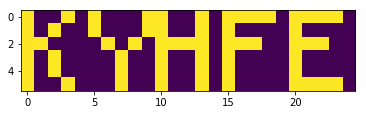

In [43]:
plt.imshow(imagekeeper, interpolation='nearest')
plt.show()

#### Day 9